<a href="https://colab.research.google.com/github/gladisor/x_ray_convolutional/blob/master/xray_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import numpy as np

X = np.load('/content/gdrive/My Drive/Colab Notebooks/xray/X.npy') / 255
y = np.load('/content/gdrive/My Drive/Colab Notebooks/xray/y.npy')

2


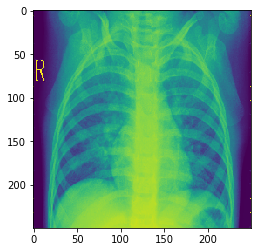

In [0]:
import matplotlib.pyplot as plt

num = 20
print(y[num])
plt.imshow(X[num].reshape(250,250))

In [0]:
X[0:5].shape

(5, 250, 250, 1)

In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, GlobalAveragePooling2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [0]:
model = Sequential()
model.add(Conv2D(input_shape=(250,250,1), filters=1, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 250, 1)       10        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 1)       10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 1)       10        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 1)       10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3844)              0

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-5)
es = tf.keras.callbacks.EarlyStopping(patience=5)

model.compile(optimizer=opt,
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), shuffle=True, workers=10)

Train on 3494 samples, validate on 1722 samples
Epoch 1/20
3494/3494 [==============================] - 11s 3ms/sample - loss: 1.0372 - accuracy: 0.4989 - val_loss: 1.0095 - val_accuracy: 0.4582
Epoch 2/20
3494/3494 [==============================] - 4s 1ms/sample - loss: 0.8798 - accuracy: 0.5784 - val_loss: 0.7287 - val_accuracy: 0.6945
Epoch 3/20
3494/3494 [==============================] - 4s 1ms/sample - loss: 0.6652 - accuracy: 0.7124 - val_loss: 0.5812 - val_accuracy: 0.7462
Epoch 4/20
3494/3494 [==============================] - 4s 1ms/sample - loss: 0.5608 - accuracy: 0.7699 - val_loss: 0.5207 - val_accuracy: 0.7683
Epoch 5/20
3494/3494 [==============================] - 4s 1ms/sample - loss: 0.5172 - accuracy: 0.7856 - val_loss: 0.4900 - val_accuracy: 0.7753
Epoch 6/20
3494/3494 [==============================] - 4s 1ms/sample - loss: 0.4980 - accuracy: 0.7842 - val_loss: 0.4822 - val_accuracy: 0.7811
Epoch 7/20
3494/3494 [==============================] - 4s 1ms/sample - los

In [0]:
np.set_printoptions(suppress=True)
pred = model.predict(X_test[0:5])
print(pred)

[[0.    0.819 0.181]
 [0.24  0.108 0.651]
 [0.436 0.371 0.193]
 [0.916 0.023 0.06 ]
 [0.    0.734 0.266]]


In [0]:
y_test[0:5]

array([1, 2, 0, 0, 1])

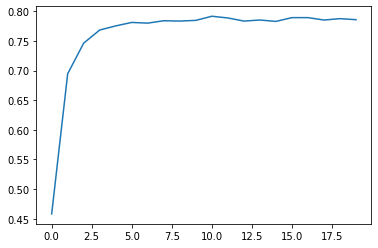

In [0]:
plt.plot(history.history['val_accuracy'])

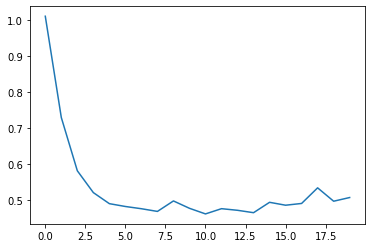

In [0]:
plt.plot(history.history['val_loss'])